# Kaggle begining : Housing Price competition

This notebook's goal is to predict the price for each house in the Kaggle test set, through the variable *SalePrice*.

Metrics : 
> Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

Competion website [here](https://www.kaggle.com/competitions/home-data-for-ml-course/overview)

## General Part

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row', 1500)
pd.set_option('display.max_column', 81)

In [3]:
data =  pd.read_csv('data/train.csv') 
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Exploratory Data Analysis 

**Goal :** Understand data
EDA can be begin on the Kaggle website in the *Data* tab.

**Form :**
- **Target variable :** *SalePrice*
- **Lines and columns :** 1460 rows × 81 columns
- **Variables' type :** 38 numerical, 43 object
- **Missings data :**
    - Some variables with many NaN. With a look on variables descriptions, and variables types/values, we understand it is relative to a missing option in the house. I think it is better to replace it with a 'None' str tag.
    - Seems to havee 2 groups base on variables' missings :
        - *basement* with 0.025 to 0.027 % of missings (BsmtQual, BsmtCond, BsmtFinType1, BsmtFinType2, BsmtExposure)
        - *garage* with 0.055479 % of missings (GarageQual, GarageFinish, GarageYrBlt, GarageType, GarageCond)

**Content :**
- **Target visualisation :** IQR = 163,000 [129,975 ; 214,000]. Some outliers, in particular after 500,000.
- **Variables signification :**
    - Numericals : 
        - Not standardized data
        - Many variables are disretized
        - Gaussian lookalike curves with sometimes peak in 0 and often skewed
    - Objects :
        - With only one category represented : *Street, Utilities*
        - Some variables seems to have poor categories variations
            - Try to binarize ? Major category / others ?
            - For *Condition1* and *Condition2* : merge ? Keep only first ? 
    - For more : cf *data_description.txt*
- **Variables/Target relations :**
    - Surface (F1, full basement, garage, GrLivArea) seems to influence target
    - Quality (OverallQual, BsmtCond) seems to influence target
    - Some periodicity (sale (june), remodel, construction)
    - Some poor corelate variables
    - => majority of object variables seems to influence target -> **test influences with univariate regression**
    - Strong correlation with *OverallQual*
    - Moderate correlation with *YearRemodAdd, YearBuilt, TotRmsAbvGrd, FullBath, 1stFlrSF, TotalBsmtSF, GarageArea, GarageCars, GrLivArea*

**Advanced part :**
- **Variables/Variables relations :**
  
    - *Exterior1st* / *Exterior2nd* : 85% the same value
    - *Garage* / *Garage* : GarageCars and GarageArea are highly correlated
    - *Basement* / *Basement* : BsmtSF1 / BsmtFullBath / TotalBsmtSf + TotalBsmtSF / BsmtUnfSF are highly/good correlated
    - *Basement* / *Garage* : no visible correlation
    - *Garage* / *GarageYrBlt* : no tendancy
    - *Basement* / *YearBuilt* : no tendancy
    - *Garage* / *YrSold* : no real tendancy for sold years
    - *Basement* / *YrSold* : no real tendancy for sold years
    - *Garage* / *OverallQual* : seems to have correlations
    - *Basement* / *OverallQual* : seems to have correlations

  
- **NaN advanced :** /
- **Hypothesis** (H0) : No particular hypothesis to verify

**Conclusion :**

### Form

In [4]:
df_eda = data.copy(deep=True)

In [5]:
df_eda.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [6]:
df_eda.shape

(1460, 81)

<Axes: >

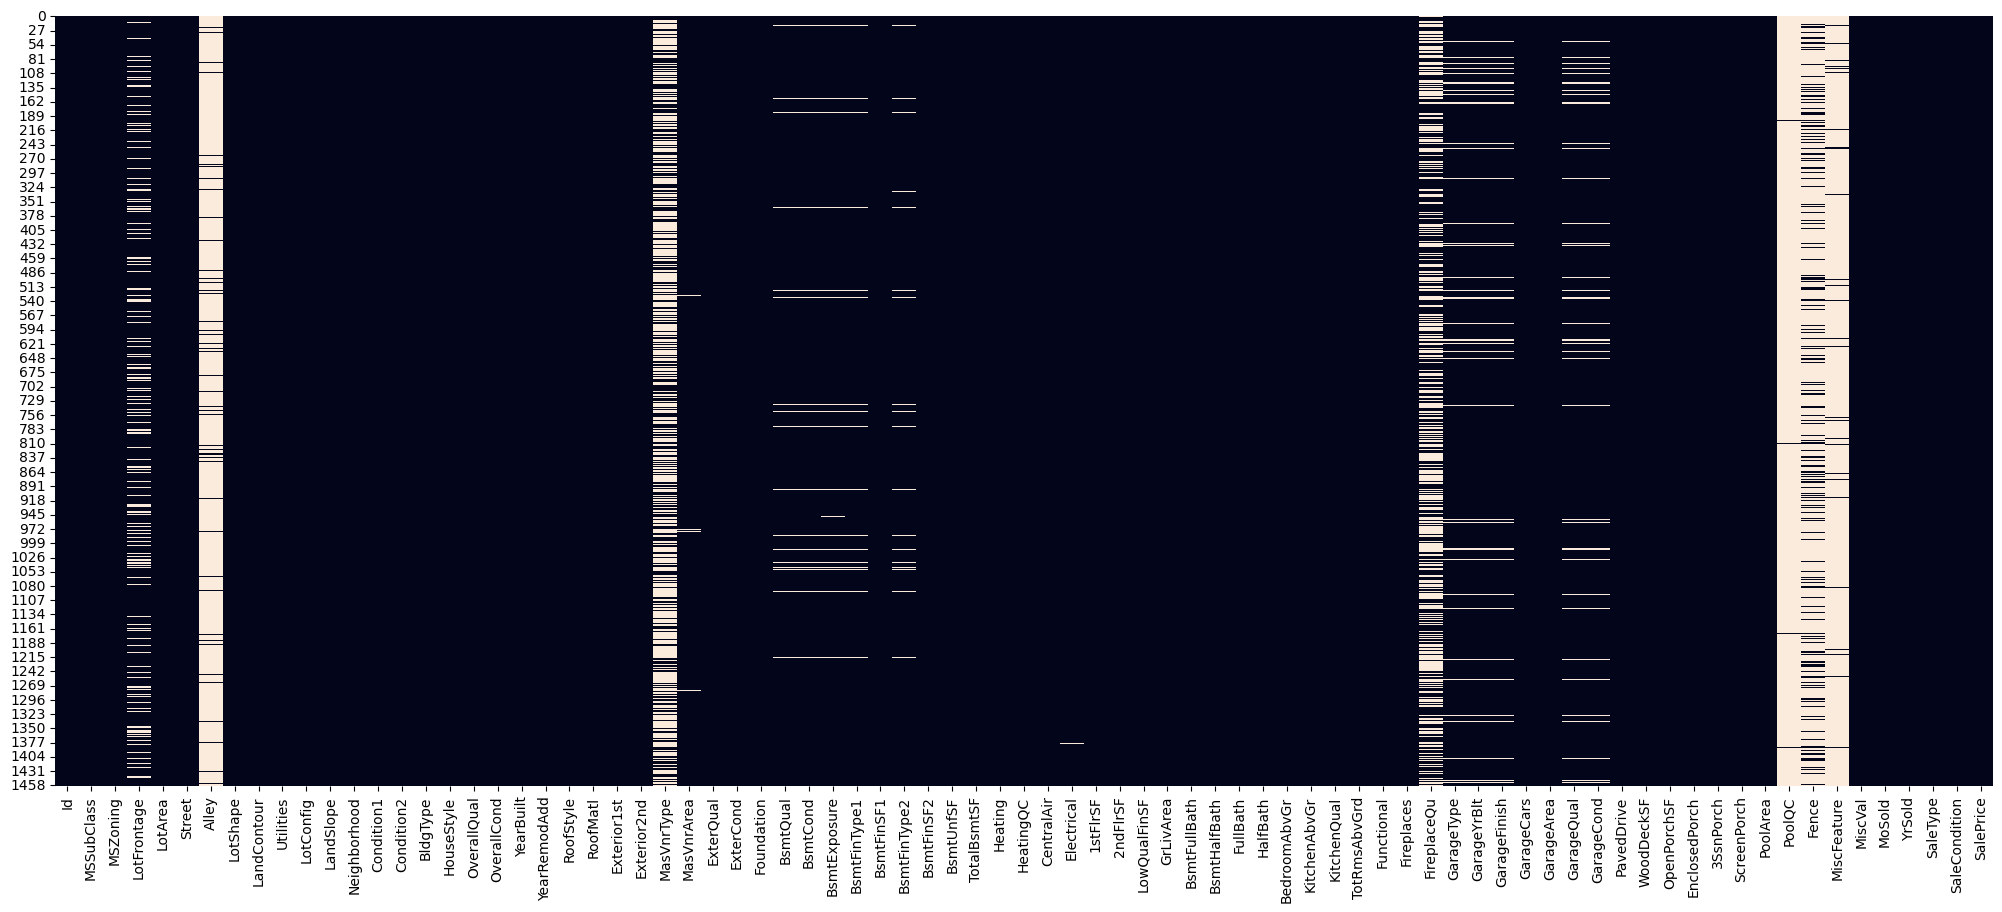

In [7]:
plt.figure(figsize=(25,10))
sns.heatmap(df_eda.isna(), cbar=False)

In [8]:
(df_eda.isna().sum()/df_eda.shape[0]).sort_values()

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
KitchenQual      0.000000
TotRmsAbvGrd     0.000000
Functional       0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
BsmtUnfSF        0.000000
3SsnPorch        0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
PavedDrive       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
EnclosedPorch    0.000000
BsmtFinSF2       0.000000
HeatingQC        0.000000
SalePrice        0.000000
Utilities        0.000000
LandContour      0.000000
Neighborhood

In [9]:
for col in df_eda.columns[(df_eda.isna().sum() > 0)] :
    print(f'{col :-<20} {df_eda[col].dtypes}')

LotFrontage--------- float64
Alley--------------- object
MasVnrType---------- object
MasVnrArea---------- float64
BsmtQual------------ object
BsmtCond------------ object
BsmtExposure-------- object
BsmtFinType1-------- object
BsmtFinType2-------- object
Electrical---------- object
FireplaceQu--------- object
GarageType---------- object
GarageYrBlt--------- float64
GarageFinish-------- object
GarageQual---------- object
GarageCond---------- object
PoolQC-------------- object
Fence--------------- object
MiscFeature--------- object


In [10]:
tmp = list(df_eda['LotFrontage'].value_counts(sort=False).index)
tmp.sort()
tmp

[21.0,
 24.0,
 30.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 114.0,
 115.0,
 116.0,
 118.0,
 120.0,
 121.0,
 122.0,
 124.0,
 128.0,
 129.0,
 130.0,
 134.0,
 137.0,
 138.0,
 140.0,
 141.0,
 144.0,
 149.0,
 150.0,
 152.0,
 153.0,
 160.0,
 168.0,
 174.0,
 182.0,
 313.0]

We can see NaN values are only for non existing options and correspondings variables. For *LotFrontage* it's confirmed by the absence of 0.

### Content
#### Removing useless columns

For now, we can keep all columns except Id

In [11]:
df_eda = df_eda.drop('Id', axis=1)
df_eda.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Target Visualization

<Axes: xlabel='SalePrice', ylabel='Density'>

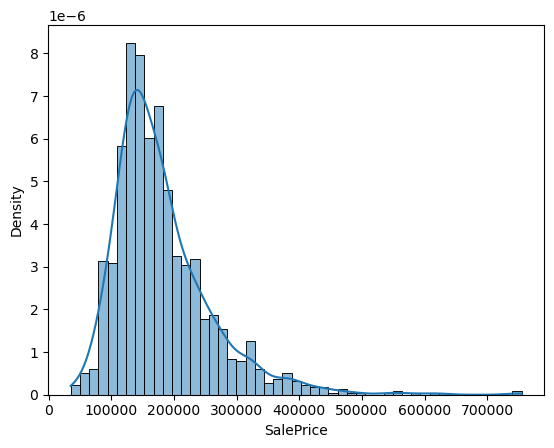

In [12]:
 sns.histplot(df_eda['SalePrice'], kde=True, stat="density")

In [13]:
df_eda['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='SalePrice'>

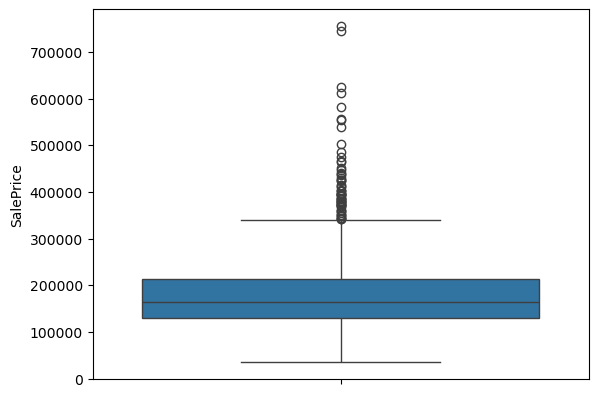

In [14]:
sns.boxplot(data=df_eda['SalePrice'])

#### Variables visualization

In [114]:
"""
for col in df_eda.select_dtypes(['int64','float64']):
    plt.figure()
    sns.histplot(df_eda[col], kde=True, stat="density")
"""

'\nfor col in df_eda.select_dtypes([\'int64\',\'float64\']):\n    plt.figure()\n    sns.histplot(df_eda[col], kde=True, stat="density")\n'

In [16]:
def get_lbl(vc):
    return [str(x) + '(' + str(int(round(y*100,0))) + '%)' for x, y in zip(vc.index, vc.values)]
"""
for col in df_eda.select_dtypes(['object']):
    plt.figure()
    vc = df_eda[col].value_counts(normalize=True)
    vc.plot.pie(labels=get_lbl(vc), title=col)
"""

"\nfor col in df_eda.select_dtypes(['object']):\n    plt.figure()\n    vc = df_eda[col].value_counts(normalize=True)\n    vc.plot.pie(labels=get_lbl(vc), title=col)\n"

#### Relation Var/Target
##### Sub groups creation

In [17]:
basement = list(df_eda.columns[df_eda.columns.str.contains('Bsmt')])
basement

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [18]:
garage = list(df_eda.columns[df_eda.columns.str.contains('Garage')])
garage

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [19]:
obj_cols = list(df_eda.select_dtypes(['object']).columns)
len(obj_cols)

43

In [20]:
num_cols = list(df_eda.select_dtypes(['int64','float64']).columns)
len(num_cols)

37

In [21]:
all_var_cols = df_eda.columns
all_var_cols = all_var_cols.drop('SalePrice')

___

In [22]:
"""
for col in all_var_cols:
    sns.relplot(data=df_eda, x=col, y='SalePrice')
"""

"\nfor col in all_var_cols:\n    sns.relplot(data=df_eda, x=col, y='SalePrice')\n"

In [23]:
#for col in df_eda.select_dtypes(['int64','float64']):
    #sns.relplot(data=df_eda, kind="line", x=col, y='SalePrice', errorbar="sd")

In [24]:
"""
for col in df_eda.select_dtypes(['int64','float64']):
    sns.jointplot(data=df_eda, x=col, y='SalePrice', kind="kde", fill=True)
"""

'\nfor col in df_eda.select_dtypes([\'int64\',\'float64\']):\n    sns.jointplot(data=df_eda, x=col, y=\'SalePrice\', kind="kde", fill=True)\n'

In [25]:
"""
for col in df_eda.select_dtypes(['object']):
    plt.figure()
    sns.histplot(data=df_eda, x='SalePrice', kde=True, stat="density", hue=col)
    plt.title(col)
"""

'\nfor col in df_eda.select_dtypes([\'object\']):\n    plt.figure()\n    sns.histplot(data=df_eda, x=\'SalePrice\', kde=True, stat="density", hue=col)\n    plt.title(col)\n'

##### Basement / Target

In [26]:
"""
for col in basement:
    sns.relplot(data=df_eda, x=col, y='SalePrice')
"""

"\nfor col in basement:\n    sns.relplot(data=df_eda, x=col, y='SalePrice')\n"

Seems to have influence :
- BsmtQual
- BsmtCond
- BsmtFinSF1
- BsmtFinType2 (Unf + GLQ/other)
- BsmtFinSF2
- BsmtFinType2 (Unf/other)
- TotalBsmtSF
- BsmtHalfBath

##### Garage/Target

In [27]:
"""
for col in garage:
    sns.relplot(data=df_eda, x=col, y='SalePrice')
"""

"\nfor col in garage:\n    sns.relplot(data=df_eda, x=col, y='SalePrice')\n"

Seems to have an influence :
- GarageType
- GarageCars
- GarageArea
- GarageQual
- GarageCond

___

In [28]:
df_eda[num_cols].corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

### Advenced EDA
#### Relation Var/Var
##### Exterior1st / Exterior2nd

<Axes: xlabel='Exterior2nd', ylabel='Exterior1st'>

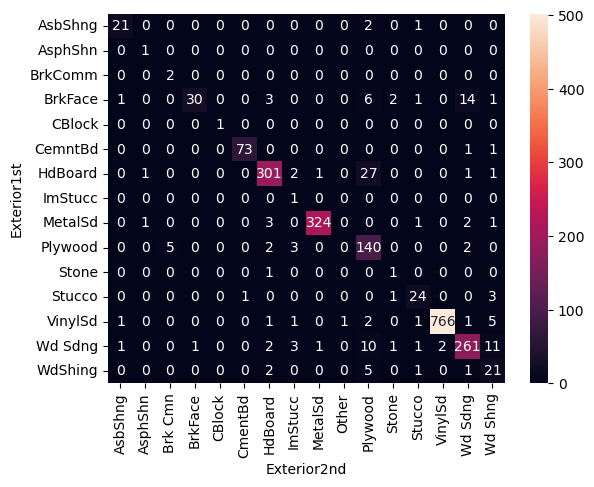

In [29]:
sns.heatmap(pd.crosstab(df_eda['Exterior1st'], df_eda['Exterior2nd']), annot=True, fmt='o')

<Axes: ylabel='proportion'>

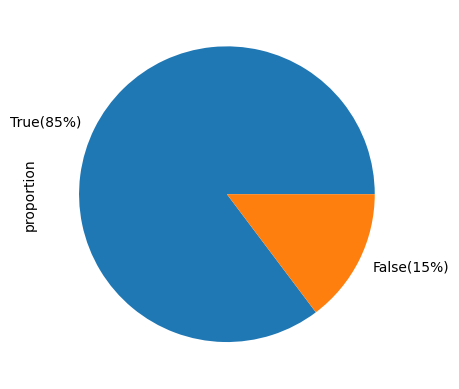

In [30]:
vc = (df_eda['Exterior1st'] == df_eda['Exterior2nd']).value_counts(normalize=True)
vc.plot.pie(labels=get_lbl(vc))

___

##### Garage / Garage

In [31]:
"""
sns.pairplot(df_eda[garage], vars=garage)
"""

'\nsns.pairplot(df_eda[garage], vars=garage)\n'

In [32]:
"""
sns.clustermap(df_eda[list(set(garage) & set(num_cols))].corr())
"""

'\nsns.clustermap(df_eda[list(set(garage) & set(num_cols))].corr())\n'

___
##### Basement / Basement

In [33]:
"""
sns.pairplot(df_eda[basement], vars=basement)
"""

'\nsns.pairplot(df_eda[basement], vars=basement)\n'

In [34]:
"""
sns.clustermap(df_eda[list(set(basement) & set(num_cols))].corr())
"""

'\nsns.clustermap(df_eda[list(set(basement) & set(num_cols))].corr())\n'

___
##### Garage / Basement

In [35]:
"""
sns.pairplot(df_eda, x_vars=garage, y_vars=basement)
"""

'\nsns.pairplot(df_eda, x_vars=garage, y_vars=basement)\n'

___
##### Garage / YrSold

In [36]:
"""
sns.pairplot(df_eda, x_vars=['YrSold'], y_vars=list(set(garage) & set(num_cols)), kind='reg')
"""

"\nsns.pairplot(df_eda, x_vars=['YrSold'], y_vars=list(set(garage) & set(num_cols)), kind='reg')\n"

In [37]:
"""
for col in list(set(garage) & set(obj_cols)):
    plt.figure()
    sns.countplot(x=col, hue='YrSold', data=df_eda)
    plt.title(col)
"""

"\nfor col in list(set(garage) & set(obj_cols)):\n    plt.figure()\n    sns.countplot(x=col, hue='YrSold', data=df_eda)\n    plt.title(col)\n"

___
##### Basement / YrSold

In [38]:
"""
sns.pairplot(df_eda, x_vars=['YrSold'], y_vars=list(set(basement) & set(num_cols)), kind='reg')
"""

"\nsns.pairplot(df_eda, x_vars=['YrSold'], y_vars=list(set(basement) & set(num_cols)), kind='reg')\n"

In [39]:
"""
for col in list(set(basement) & set(obj_cols)):
    plt.figure()
    sns.countplot(x=col, hue='YrSold', data=df_eda)
    plt.title(col)
"""

"\nfor col in list(set(basement) & set(obj_cols)):\n    plt.figure()\n    sns.countplot(x=col, hue='YrSold', data=df_eda)\n    plt.title(col)\n"

___
##### Basement / YearBuilt

In [40]:
"""
sns.pairplot(df_eda, x_vars=['YearBuilt'], y_vars=list(set(basement) & set(num_cols)), kind='reg')
"""

"\nsns.pairplot(df_eda, x_vars=['YearBuilt'], y_vars=list(set(basement) & set(num_cols)), kind='reg')\n"

___
##### Garage / OverallQual

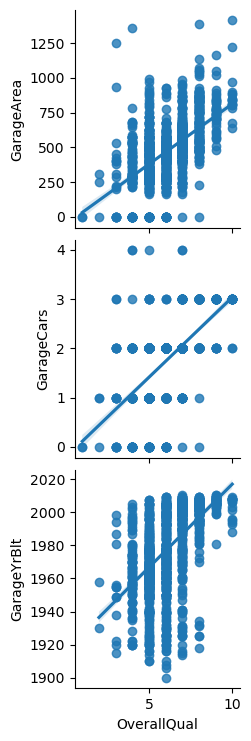

In [41]:
sns.pairplot(df_eda, x_vars=['OverallQual'], y_vars=list(set(garage) & set(num_cols)), kind='reg')

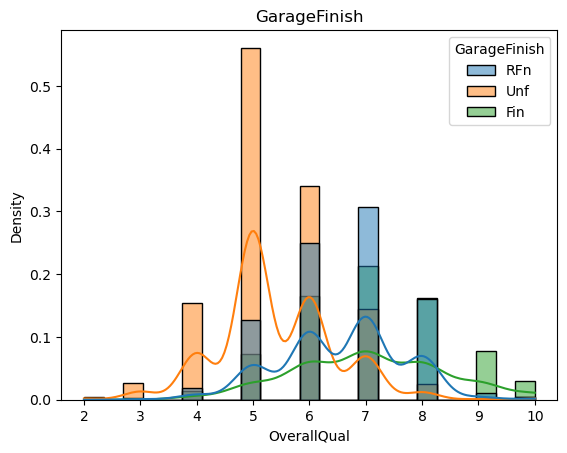

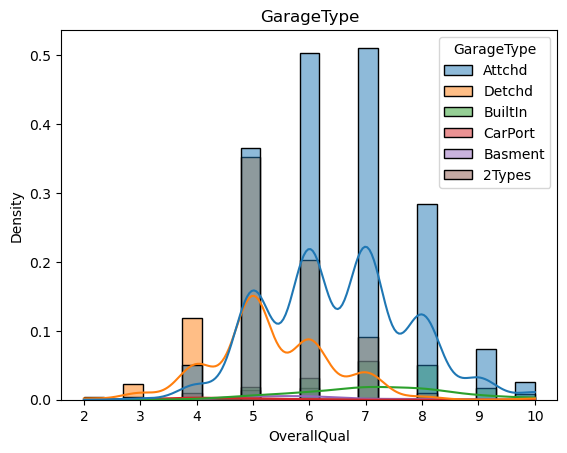

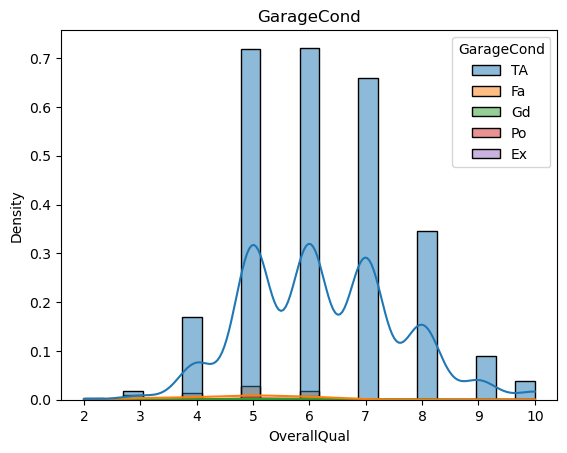

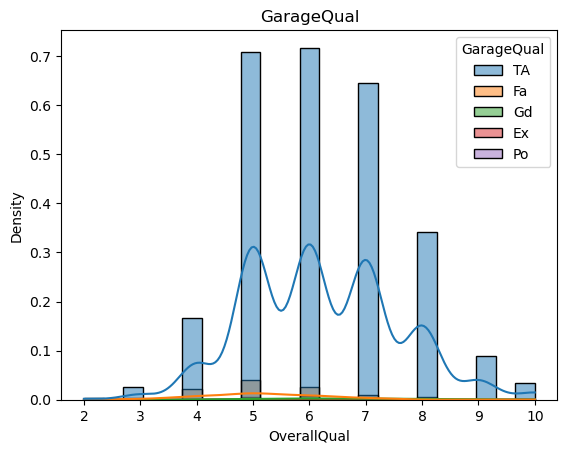

In [42]:
for col in list(set(garage) & set(obj_cols)):
    plt.figure()
    sns.histplot(data=df_eda, x='OverallQual', kde=True, stat="density", hue=col)
    plt.title(col)

___
##### Basement / OverallQual

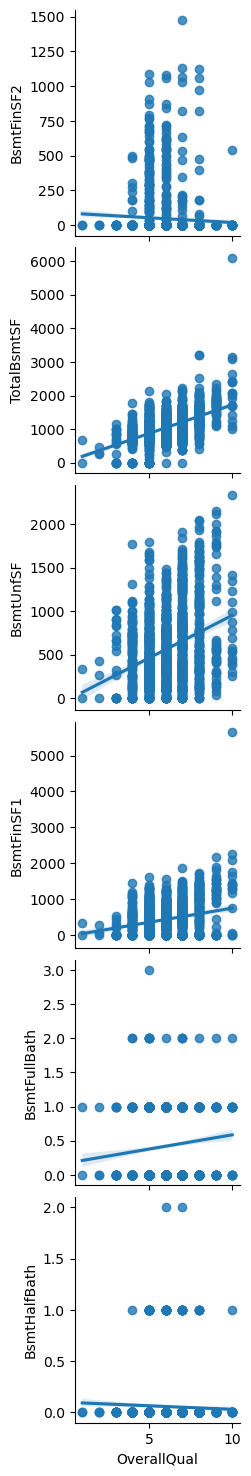

In [43]:
sns.pairplot(df_eda, x_vars=['OverallQual'], y_vars=list(set(basement) & set(num_cols)), kind='reg')

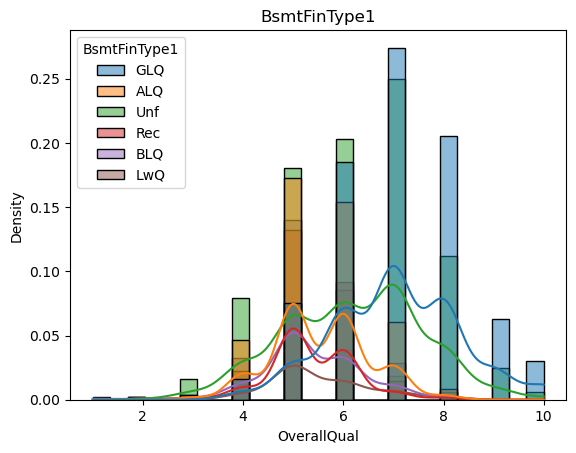

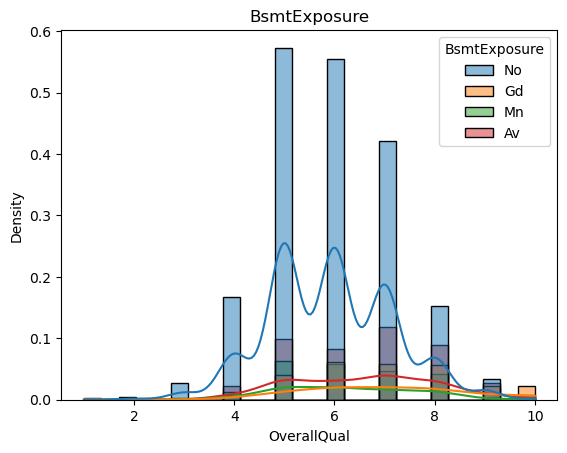

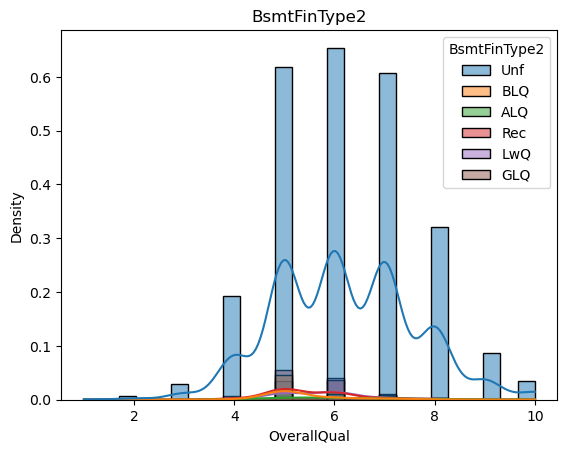

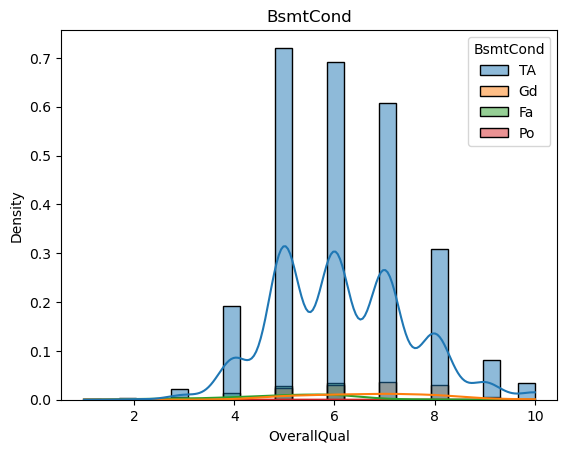

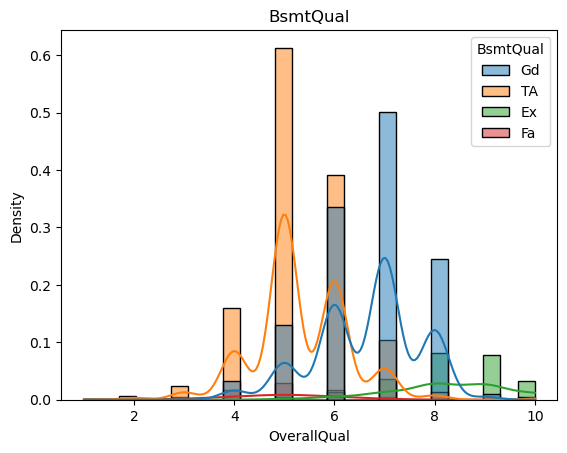

In [44]:
for col in list(set(basement) & set(obj_cols)):
    plt.figure()
    sns.histplot(data=df_eda, x='OverallQual', kde=True, stat="density", hue=col)
    plt.title(col)

#### Advenced NaN analysis

/

#### Hypothesis test

/

## Pre-processing

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder #OrdinalEncoder
from sklearn.ensemble import IsolationForest
from scipy.stats import ttest_ind, chisquare

### Step 1 : Formatting data to prepare model creation

- Train / test
- Encoding
- NaN cleaning

In [46]:
df = data.copy(deep=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0)
print(trainset.shape)
print(testset.shape)

(1095, 81)
(365, 81)


In [48]:
def t_test(df_pos, df_neg, col, alpha=0.05):
    stat, p = ttest_ind(df_neg[col].dropna(), df_pos[col].dropna())
    if p < alpha:
        return 'H0 rejected'
    else:
        return 'H0 not rejected (p=' + str(p) + ')'

In [49]:
t_test(trainset, trainset, 'SalePrice')

'H0 not rejected (p=1.0)'

No significatives target differences between train and test sets.

#### Encoding variables

Here we use OneHotEncoders because of regression models sensibility on encoding

In [50]:
def encoding(p_df, y_name, encoder=None):
    df_to_encode = p_df[obj_cols]

    if encoder==None:
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform="pandas")
        df_encoded = encoder.fit_transform(df_to_encode)
    else:
        df_encoded = encoder.transform(df_to_encode)

    df_num = p_df[num_cols + ['Id']]
    new_df = df_num.join(df_encoded) 
    
    return new_df, encoder 

In [51]:
#tmp, tmp2 = encoding(trainset, 'SalePrice')
#tmp.head()

In [52]:
#tmp.isna().sum().sort_values()

In [196]:
def feature_engineering(df):

    ndf = df.copy(deep=True)
    ndf = ndf.drop([
        'Id',
    ], axis = 1)

    # re equilibrate skewed variables
    skewed = ['SalePrice', 
             '2ndFlrSF',
             'BsmtFinSF1',
             'BsmtFinSF2',
             'BsmtUnfSF',
             'EnclosedPorch',
             'GrLivArea',
             'LotArea',
             'LotFrontage',
             'MasVnrArea',
             'OpenPorchSF1stFlrSF',
             'ScreenPorch',
             'TotalBsmtSF',
             'WoodDeckSF',
             ]
    ndf = ndf.apply(
        lambda x: np.log(x) if (x.name in skewed and not x.isnull().any() and (x > 0).all()) else x
    )
    
    return ndf

In [54]:
def imputation(df):
    ndf = df.copy(deep=True)
    #ndf['isna'] = ndf.isna().sum(axis=1)
    ndf = df.fillna(-999)
    return ndf

In [55]:
def outliers_removing(df, x_cols):
    
    ndf = df
    model = IsolationForest(contamination=0.02, random_state=0)
    not_outliers = (model.fit_predict(ndf[x_cols]) != -1)
    ndf = ndf[not_outliers]
    
    return ndf

In [156]:
def preprocessing(df, encoder=None, y_name='SalePrice'):
    ndf, encoder = encoding(df, y_name, encoder)
    ndf = feature_engineering(ndf)
    ndf = imputation(ndf)
    
    x_cols = list(ndf.columns)
    x_cols.remove(y_name)
    ndf = outliers_removing(ndf, x_cols)

    if y_name in list(ndf.columns):
        X = ndf.drop(y_name, axis = 1)
        y = ndf[y_name]
    else:
        X = ndf
        y = None
        print('No outcome')

    return X, y, encoder

In [193]:
X_train, y_train, encoder_train = preprocessing(trainset)
print(X_train.shape)
print(y_train.shape)

(1073, 297)
(1073,)


In [194]:
X_test, y_test, _ = preprocessing(testset, encoder=encoder_train)
print(X_test.shape)
print(y_test.shape)

(357, 297)
(357,)


In [117]:
"""
plt.figure()
sns.histplot(df_eda['SalePrice'], kde=True, stat="density")
plt.figure()
sns.histplot(y_train, kde=True, stat="density")
"""

'\nplt.figure()\nsns.histplot(df_eda[\'SalePrice\'], kde=True, stat="density")\nplt.figure()\nsns.histplot(y_train, kde=True, stat="density")\n'

### Step 2 : Improve formatting to improve model

*After first models tests*
- Feature selection
- Feature engineering
- Feature scaling -> no needed because forest models aren't sensitive to normalization 
- Outliers

In [118]:
X_train.var(axis=0).sort_values()

Condition2_Artery        0.000000e+00
PoolQC_Ex                0.000000e+00
Condition2_PosN          0.000000e+00
Exterior2nd_AsphShn      0.000000e+00
Exterior1st_AsphShn      0.000000e+00
PoolQC_Fa                9.319664e-04
RoofMatl_Membran         9.319664e-04
Heating_OthW             9.319664e-04
Heating_Wall             9.319664e-04
Foundation_Wood          9.319664e-04
LotConfig_FR3            9.319664e-04
Utilities_NoSeWa         9.319664e-04
Utilities_AllPub         9.319664e-04
GarageCond_Ex            9.319664e-04
GarageQual_Ex            9.319664e-04
SaleType_Con             9.319664e-04
PoolQC_Gd                9.319664e-04
Exterior1st_BrkComm      9.319664e-04
Exterior1st_ImStucc      9.319664e-04
HeatingQC_Po             9.319664e-04
Electrical_nan           9.319664e-04
ExterCond_Po             9.319664e-04
RoofMatl_Metal           9.319664e-04
Condition2_RRAe          9.319664e-04
Exterior1st_CBlock       9.319664e-04
Exterior2nd_CBlock       9.319664e-04
SaleType_Oth

In [119]:
#X_train[num_cols].var(axis=0).sort_values()

In [120]:
"""
st, pval = f_regression(X_train, y_train)
tmp = X_train[X_train.columns[pval<=0.05]]
tmp = list(tmp.columns)
tmp.sort()
print(len(tmp))
tmp
"""

'\nst, pval = f_regression(X_train, y_train)\ntmp = X_train[X_train.columns[pval<=0.05]]\ntmp = list(tmp.columns)\ntmp.sort()\nprint(len(tmp))\ntmp\n'

In [121]:
"""
tmp = trainset[trainset['SalePrice'] > 350000]
outliers_p = len(tmp.index) / len(X_train.index) * 100
outliers_p
"""

"\ntmp = trainset[trainset['SalePrice'] > 350000]\noutliers_p = len(tmp.index) / len(X_train.index) * 100\noutliers_p\n"

## Modelling

In [122]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression, ElasticNet,\
                                 BayesianRidge, ARDRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.decomposition import PCA

In [123]:
#model = LinearRegression()

### Evaluation process

In [124]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import learning_curve

In [132]:
def evaluation(model, model_name=''):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    mean_ae = mean_absolute_error(y_test, y_pred)
    med_ae = median_absolute_error(y_test, y_pred)
    print('Scores :')
    print(f'RMSE : {rmse} ({round(np.exp(rmse), 2)}$)')
    print(f'MeanAE : {mean_ae} ({round(np.exp(mean_ae), 2)}$)')
    print(f'MedAE : {med_ae} ({round(np.exp(med_ae), 2)}$)')
    print('\n')

    plt.figure(figsize=(12,8))
    err_hist = np.abs(y_test - y_pred)
    plt.hist(err_hist, bins=50)
    plt.show()

    for metric in ['neg_root_mean_squared_error']: #, 'neg_mean_absolute_error', 'neg_median_absolute_error']:
        N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                   cv=5, scoring=metric,
                                                   train_sizes=np.linspace(0.1,1,10),
                                                   random_state=0
                                                  )
        
        plt.figure(figsize=(12,8))
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.title(model_name + '_' * int(model_name != '') + metric)
        plt.legend()
        plt.show()

### Pre modelling for preprocessing

In [126]:
model = make_pipeline(
                      #PolynomialFeatures(2),
                      SelectKBest(f_regression,k=179),
                      #PCA(n_components=87),
                      RobustScaler(),
                      LinearRegression()
)

___

Scores :
RMSE : 0.11790154547561242 (1.13$)
MeanAE : 0.08127250892628017 (1.08$)
MedAE : 0.058284583988205796 (1.06$)




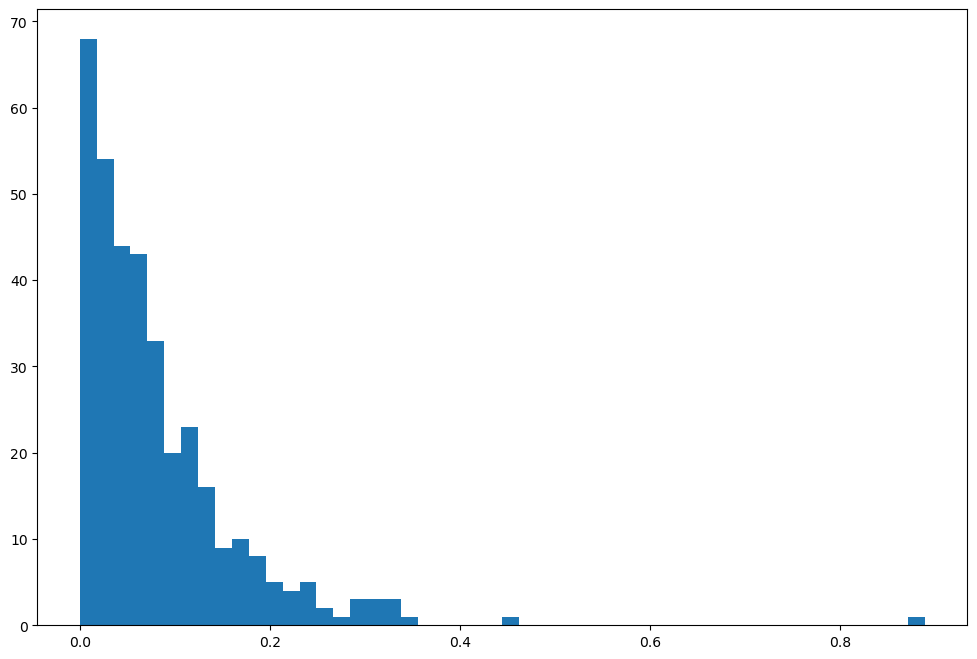

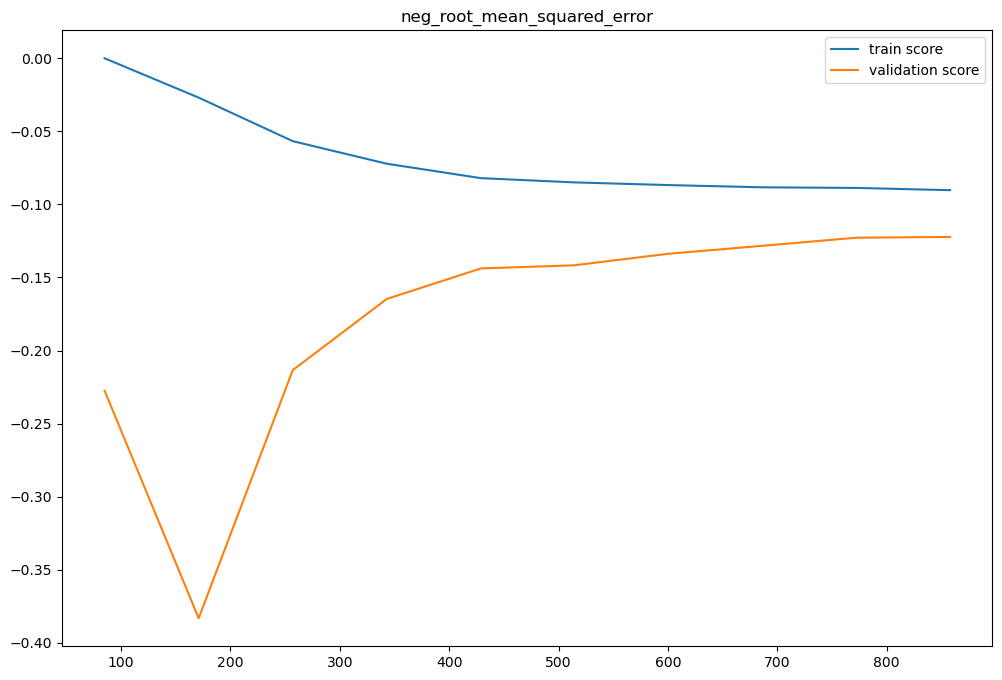

In [197]:
evaluation(model)

Pre model try :
1. LinearRegression *without* scaler :
    - score : 53962.26782876536
    - curve :
        - no overfitting ?
        - error ∈ [0 ; 50,000]
2. LinearRegression *with* StandarScaler :
    - score : 2.08436164931743e+17
    - curve :
        - no overfitting ?
        - error ∈ [0 ; 50,000]
3. LinearRegression *without* scaler :
    - score : 49541.50985151606
    - curve :
        - no overfitting ?
        - error ∈ [0 ; 50,000]
4. LinearRegression *with* RobustScaler :
    - score : 49541.50985151606
    - curve :
        - no overfitting ?
        - error ∈ [0 ; 50,000]
5. LinearRegression *with* RobustScaler + keep only p>0.2 at univariate :
    - score : 49541.50985151606
    - curve :
        - no overfitting ?
        - error ∈ [0 ; 50,000]
6. LinearRegression *with* RobustScaler + keep only p>0.05 at univariate :
    - score : 
        - RMSE : 37945.80399565608
        - MeanAE : 19524.636089584248
        - MedSE : 13429.146306039867
    - curve :
        - train = validation
        - error ≃ score
7. LinearRegression *with* RobustScaler + keep only 179 kbest (nothing change else than the use of selectKbest)
8. Same + PCA : worst
9. Same + PolynomialFeatures : disastrous
10. LinearRegression *with* RobustScaler + same + outliers removed ('auto') :
    - score : 
        - RMSE : 27317.291509442257
        - MeanAE : 17922.780900793416
        - MedSE : 13660.537290180786
    - curve :
        - train near to validation
        - error ≃ score
    - histo : one big error (250 000), some around 100 000
11. With StandardScaler in place of RobustScaler : one very big error  
12. LinearRegression *with* RobustScaler + same + outliers removed (0.03) :
    - score : 
        - RMSE : 23597.65589876364
        - MeanAE : 16775.619479233785
        - MedSE : 11984.888536493912
    - curve :
        - train = validation
        - error = score
    - histo : one big error (120 000), some around 80 000
13. LinearRegression *with* RobustScaler + same + outliers removed (0.02) :
    - score : 
        - RMSE : 23154.000453857836
        - MeanAE : 16499.29172163451
        - MedSE : 12505.90056184768
    - curve :
        - train = validation
        - error = score
    - histo : two big error (120 000), some around 80 000
14. LinearRegression *with* RobustScaler + same + outliers removed (0.01) : worst than 0.02
15. LinearRegression *with* RobustScaler + same + outliers removed (0.015) : worst than 0.02
13. LinearRegression *with* RobustScaler + same + outliers removed (0.025) :
    - score : 
        - RMSE : 23844.64328020143
        - MeanAE : 16889.43097539176
        - MedSE : 12362.244372643123
    - curve :
        - train = validation and decrease at the end
        - error = score
    - histo : two big error (120 000), some around 80 000
14. LinearRegression *with* RobustScaler + same + outliers removed (0.021) : worst than 0.02
15. LinearRegression *with* RobustScaler + same + outliers removed (0.019) : worst than 0.02
16. Retry after log SalePrice :
    - RMSE : 0.11822539824194293 (1.13)
    - MeanAE : 0.08236409401151401 (1.09)
    - MedAE : 0.0607882153241448 (1.06)
16. Retry after log skewed variables :
    - RMSE : 0.11790154547561242 (1.13)
    MeanAE : 0.08127250892628017 (1.08)
    MedAE : 0.058284583988205796 (1.06)

___
### Modelling

In [198]:
preprocessor = make_pipeline(
    SelectKBest(f_regression,k=179), 
    #PCA(n_components=87),
    RobustScaler()
)

In [199]:
model_lst = []

#model_lst.append(make_pipeline(preprocessor, LinearRegression()))
#model_lst.append(make_pipeline(preprocessor, Lasso(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, Ridge(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, LogisticRegression(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, ElasticNet(random_state=0)))
model_lst.append(make_pipeline(preprocessor, BayesianRidge()))
model_lst.append(make_pipeline(preprocessor, ARDRegression()))
#model_lst.append(make_pipeline(preprocessor, SVR()))
#model_lst.append(make_pipeline(preprocessor, SGDRegressor(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, DecisionTreeRegressor(random_state=0)))
model_lst.append(make_pipeline(preprocessor, RandomForestRegressor(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, AdaBoostRegressor(random_state=0)))
#model_lst.append(make_pipeline(preprocessor, KNeighborsRegressor()))

In [200]:
dict_of_models = {}
for mdl in model_lst :
    name = type(mdl.steps[-1][-1]).__name__
    dict_of_models[name] = mdl

print(list(dict_of_models.keys()))

['BayesianRidge', 'ARDRegression', 'RandomForestRegressor']


___

In [201]:
"""
for name, model in dict_of_models.items():
    print('>>> ', name)
    evaluation(model, model_name=name)
    print('_'*120, '\n')
"""

"\nfor name, model in dict_of_models.items():\n    print('>>> ', name)\n    evaluation(model, model_name=name)\n    print('_'*120, '\n')\n"

**Test with :** ['LinearRegression', 'Lasso', 'Ridge', 'LogisticRegression', 'ElasticNet', 'BayesianRidge', 'ARDRegression', 'SVR', 'SGDRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'KNeighborsRegressor']

**Keeping :** ['ElasticNet', 'BayesianRidge', 'ARDRegression', 'RandomForestRegressor']

### Models optimisation

In [202]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [203]:
for name, model in dict_of_models.items():
    print(model)
    print('\n\n')

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest',
                                  SelectKBest(k=179,
                                              score_func=<function f_regression at 0x7f99bc243ce0>)),
                                 ('robustscaler', RobustScaler())])),
                ('bayesianridge', BayesianRidge())])



Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest',
                                  SelectKBest(k=179,
                                              score_func=<function f_regression at 0x7f99bc243ce0>)),
                                 ('robustscaler', RobustScaler())])),
                ('ardregression', ARDRegression())])



Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('selectkbest',
                                  SelectKBest(k=179,
                                              score_func=<function f_regression at 0x7f99bc243ce0>)),
                                 ('robustscaler',

In [212]:
hp_general = {
    'pipeline__selectkbest__k' : list(range(150,297)),
    #'pipeline__pca__n_components' : [10,25,50,75,87],
}

In [205]:
hp_ElasticNet = {
    'elasticnet__alpha' : [0, 1, 10],
    'elasticnet__warm_start' : [False, True],
    'elasticnet__tol' : [1e-5,1e-4,1e-3],
    'elasticnet__l1_ratio' : [0.25,0.5,0.75],
}

In [206]:
hp_BayesianRidge = {
    'bayesianridge__tol' : [1e-4,1e-3],
    'bayesianridge__alpha_1' : [1e-8,1e-7],
    'bayesianridge__alpha_2' : [1e-8,1e-7],
    'bayesianridge__lambda_1' : [1e-5, 1e-2],
    'bayesianridge__lambda_2' : [1e-8, 1e-7],
}

In [207]:
hp_ARDRegression = {
    'ardregression__tol' : [1e-6, 1e-4],
    'ardregression__alpha_1' : [1e-6, 1e-4],
    'ardregression__alpha_2' : [1e-5, 1e-4],
    'ardregression__lambda_1' : [1e-7, 1e-6],
    'ardregression__lambda_2' : [1e-7, 1e-6],
    'ardregression__threshold_lambda' : [3_000, 4_000],
}

In [208]:
hp_RandomForestRegressor = {
    'randomforestregressor__n_estimators' : Integer(150, 500),
    'randomforestregressor__criterion' : ['squared_error', 'absolute_error'],
    'randomforestregressor__max_features' : Integer(10, 1000),
    'randomforestregressor__warm_start' : [False, True],
}

In [213]:
dct_hyper_params = {
    #'ElasticNet' : hp_ElasticNet,
    'BayesianRidge' : hp_BayesianRidge,
    'ARDRegression' : hp_ARDRegression,
    'RandomForestRegressor' : hp_RandomForestRegressor,
}

for key in dct_hyper_params:
    dct_hyper_params[key].update(hp_general)

In [210]:
import warnings
warnings.filterwarnings('ignore')

>>>  BayesianRidge
OrderedDict({'bayesianridge__alpha_1': 1.517578239029447e-08, 'bayesianridge__alpha_2': 1.83736808667223e-08, 'bayesianridge__lambda_1': 0.008902360740329494, 'bayesianridge__lambda_2': 1.1761764484341009e-08, 'bayesianridge__tol': 0.00021207455903481687, 'pipeline__selectkbest__k': 266})
Scores :
RMSE : 0.10540696439982036 (1.11$)
MeanAE : 0.07555915804853848 (1.08$)
MedAE : 0.05819149385717459 (1.06$)




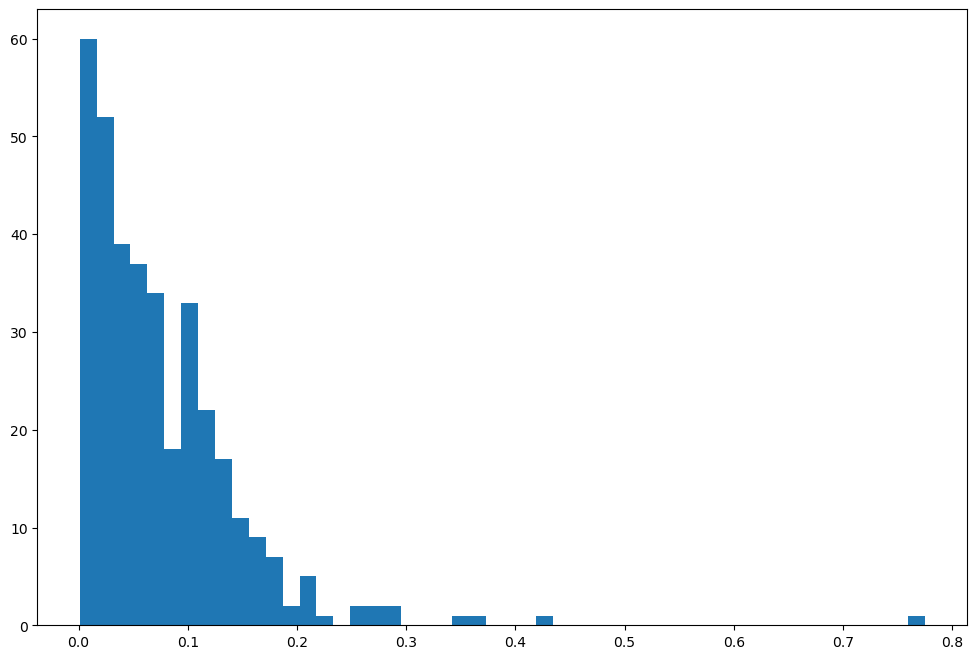

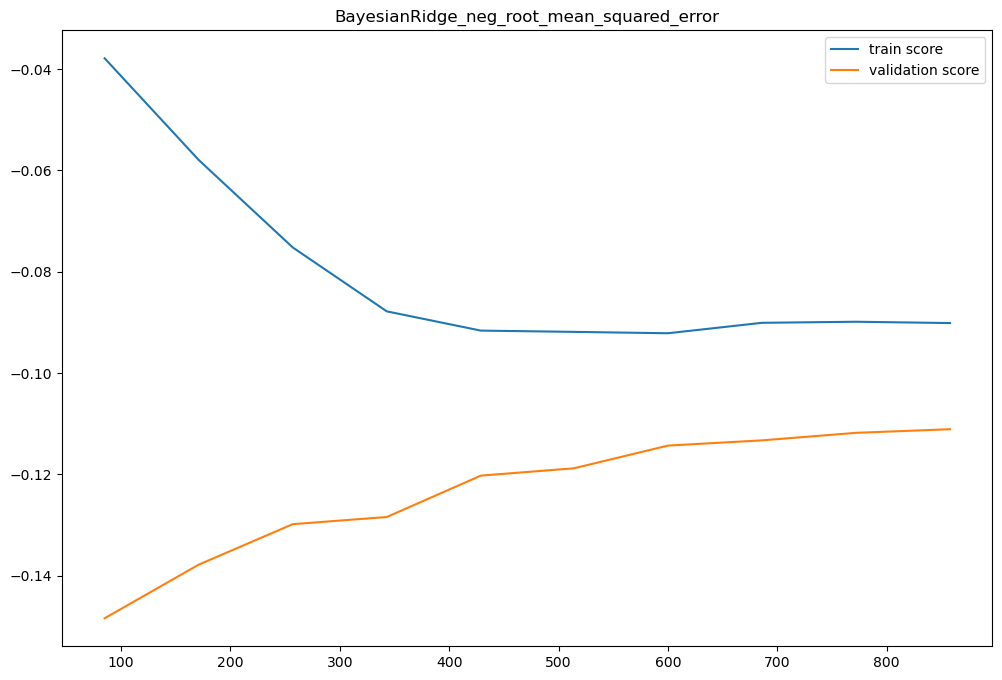

________________________________________________________________________________________________________________________ 

>>>  ARDRegression
OrderedDict({'ardregression__alpha_1': 9.571017162494206e-05, 'ardregression__alpha_2': 3.438552519550807e-05, 'ardregression__lambda_1': 7.048764720680063e-07, 'ardregression__lambda_2': 3.154333241573492e-07, 'ardregression__threshold_lambda': 3408, 'ardregression__tol': 8.132034649933548e-05, 'pipeline__selectkbest__k': 235})
Scores :
RMSE : 0.11555162484682371 (1.12$)
MeanAE : 0.0791657365565981 (1.08$)
MedAE : 0.05911371786778119 (1.06$)




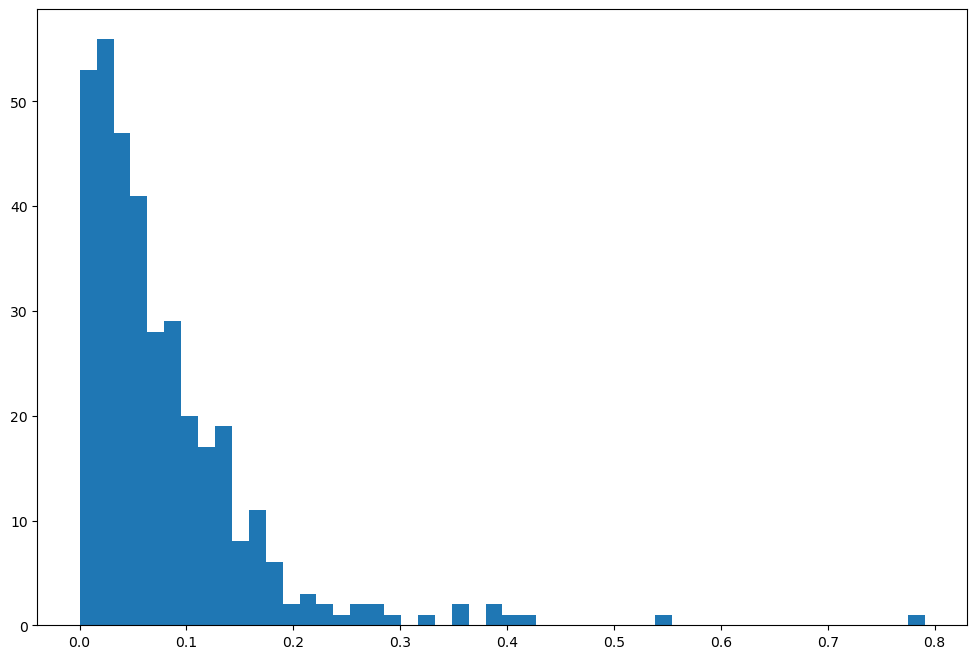

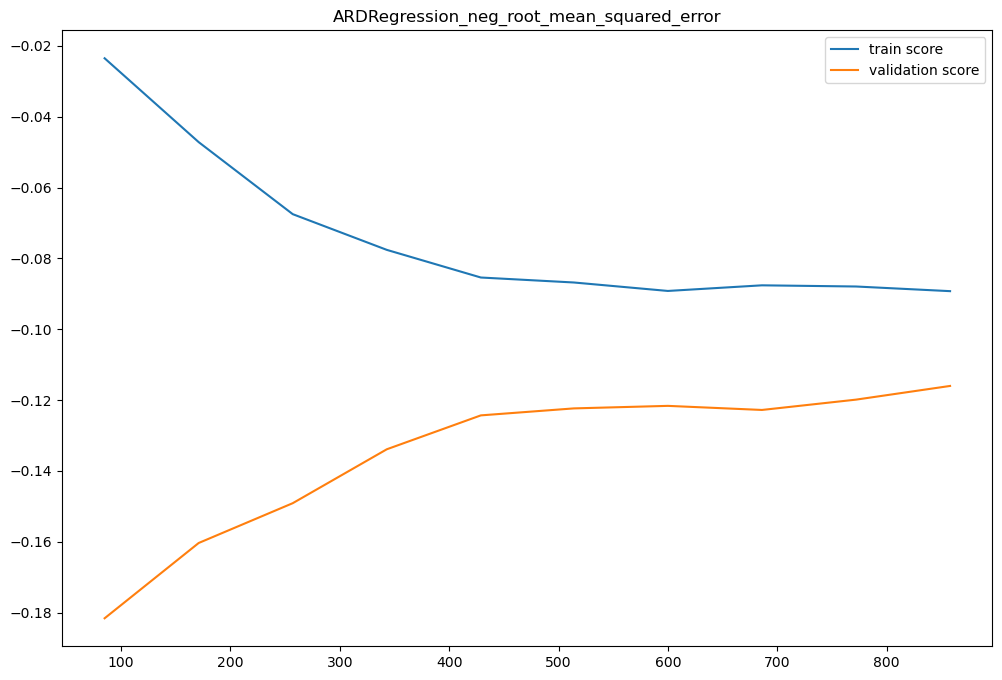

________________________________________________________________________________________________________________________ 

>>>  RandomForestRegressor
OrderedDict({'pipeline__selectkbest__k': 198, 'randomforestregressor__criterion': 'absolute_error', 'randomforestregressor__max_features': 59, 'randomforestregressor__n_estimators': 468, 'randomforestregressor__warm_start': False})
Scores :
RMSE : 0.12339543382493906 (1.13$)
MeanAE : 0.08649097722487634 (1.09$)
MedAE : 0.06034929867004202 (1.06$)




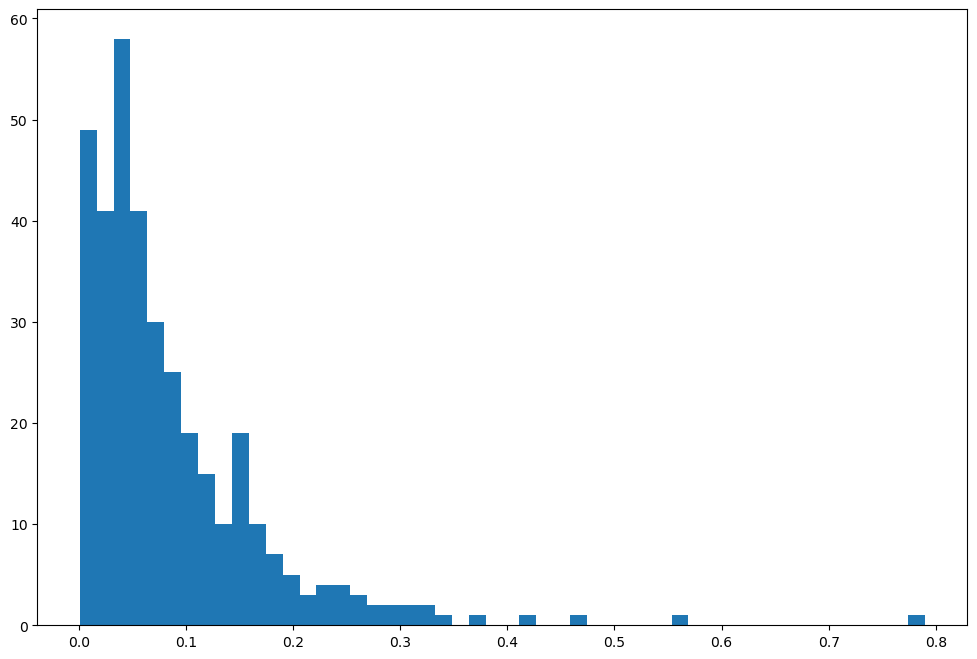

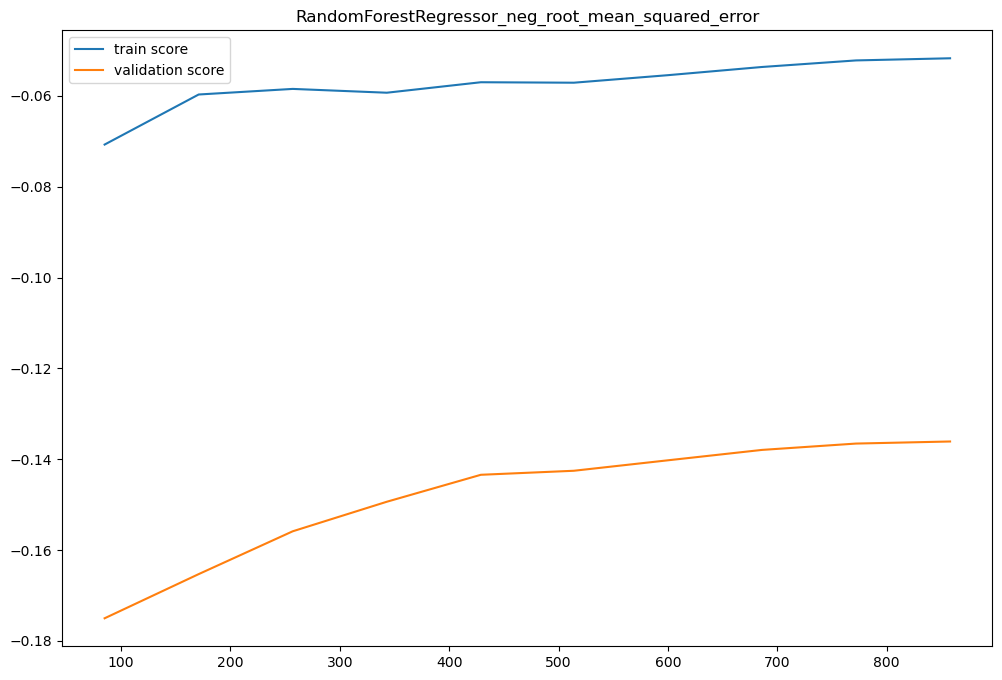

________________________________________________________________________________________________________________________ 



In [214]:
dct_best_estim = {}
for name, hp in dct_hyper_params.items():
    model = dict_of_models[name]
    
    print('>>> ', name)
    
    #grid = BayesSearchCV(model, hp, scoring='neg_root_mean_squared_error', cv=5, random_state=0)
    #grid = RandomizedSearchCV(model, hp, scoring='neg_root_mean_squared_error', cv=5, n_iter=30, random_state=0)
    grid = BayesSearchCV(model, hp, scoring='neg_root_mean_squared_error', cv=5, n_iter=30, random_state=0)
    grid.fit(X_train, y_train)
    print(grid.best_params_)

    dct_best_estim[name] = grid

    #y_pred = grid.predict(X_test)
    #print(classification_report(y_test, y_pred)

    evaluation(grid.best_estimator_, model_name=name)
    
    print('_'*120, '\n')

**Model optimisation :**
1. ...
    - ElasticNet :
        - best : {'elasticnet__alpha': 0, 'elasticnet__l1_ratio': 0.75, 'elasticnet__tol': 0.001, 'elasticnet__warm_start': False, 'pipeline__pca__n_components': 87, 'pipeline__selectkbest__k': 189}
        - score : 
            - RMSE : 24251.857256823376
            - MeanAE : 17303.69764614056
            - MedSE : 12860.969146149379
        - curve :
            - histo : exp ->  60k + somes 80k and few 120k
            - train/valid : no ov
   - BayesianRidge :
        - best : {'bayesianridge__alpha_1': 1e-07, 'bayesianridge__alpha_2': 1e-07, 'bayesianridge__lambda_1': 1e-05, 'bayesianridge__lambda_2': 1e-07, 'bayesianridge__tol': 0.0001, 'pipeline__selectkbest__k': 189}
        - score : 
            - RMSE : 22479.30072823478
            - MeanAE : 16058.716870099046
            - MedSE : 12921.4622910732
        - curve :
            - histo : exp -> 55k + somes 80k  + 110k + 130k
            - train/valid :
    - ARDRegression :
        - best : {'ardregression__alpha_1': 1e-05, 'ardregression__alpha_2': 1e-05, 'ardregression__lambda_1': 1e-06, 'ardregression__lambda_2': 5.816920061687875e-06, 'ardregression__threshold_lambda': 3859, 'ardregression__tol': 1e-05, 'pipeline__selectkbest__k': 189}
        - score : 
            - RMSE : 22364.697662435967
            - MeanAE : 15820.676573929197
            - MedSE : 11958.039777357568
        - curve :
            - histo : exp -> 70k/90k + 110k + 120k
            - train/valid : sligh ov
    - RandomForestRegressor :
        - best : {'pipeline__selectkbest__k': 169, 'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__max_features': None, 'randomforestregressor__n_estimators': 200, 'randomforestregressor__warm_start': False}
        - score : 
            - RMSE : 23599.18822584603
            - MeanAE : 15609.157184873948
            - MedSE : 10300.119999999995
        - curve :
            - histo : exp -> 80k + somes 120k + 160k
            - train/valid : overfitting
2. ...
   - BayesianRidge :
        - best : {'bayesianridge__alpha_1': 4.877964496626273e-08, 'bayesianridge__alpha_2': 7.737983897855525e-08, 'bayesianridge__lambda_1': 0.004616442909140281, 'bayesianridge__lambda_2': 8.912718092360759e-08, 'bayesianridge__tol': 0.000876419640419354, 'pipeline__selectkbest__k': 192}
        - score : 
            - RMSE : 22278.336090259047
            - MeanAE : 15924.064702534188
            - MedSE : 12756.731630452487
        - curve :
            - histo : exp -> 55k + somes 80k  + 110k + 130k
            - train/valid : same
    - ARDRegression :
        - best : {'ardregression__alpha_1': 9.571017162494206e-05, 'ardregression__alpha_2': 3.438552519550807e-05, 'ardregression__lambda_1': 7.048764720680063e-07, 'ardregression__lambda_2': 3.154333241573492e-07, 'ardregression__threshold_lambda': 3408, 'ardregression__tol': 8.132034649933548e-05, 'pipeline__selectkbest__k': 235}
        - score : 
            - RMSE : 22420.091829427976
            - MeanAE : 15870.5471005455
            - MedSE : 11734.82332244562
        - curve :
            - histo : exp -> 50k + some 60k + some 80k + 110k + 120k
            - train/valid : sligh ov
    - RandomForestRegressor :
        - best : {'pipeline__selectkbest__k': 176, 'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__max_features': 251, 'randomforestregressor__n_estimators': 305, 'randomforestregressor__warm_start': True}
        - score : 
            - RMSE : 23752.422687929466
            - MeanAE : 15692.266464618635
            - MedSE : 9815.442622950824
        - curve :
            - histo : exp -> 70k + 100k + 110k + 160k
            - train/valid : overfitting
3. New try after log skewed variables
   - BayesianRidge :
        - best : {'bayesianridge__alpha_1': 1.517578239029447e-08, 'bayesianridge__alpha_2': 1.83736808667223e-08, 'bayesianridge__lambda_1': 0.008902360740329494, 'bayesianridge__lambda_2': 1.1761764484341009e-08, 'bayesianridge__tol': 0.00021207455903481687, 'pipeline__selectkbest__k': 266}
        - score : 
            - RMSE : 0.10540696439982036 (1.11)
            - MeanAE : 0.07555915804853848 (1.08)
            - MedAE : 0.05819149385717459 (1.06)
        - curve :
            - histo : exp -> 0.3 + somes 0.4  + 0.8
            - train/valid : slight interval, not really ov
    - ARDRegression :
        - best : {'ardregression__alpha_1': 1.96136491426469e-05, 'ardregression__alpha_2': 6.111462367508804e-05, 'ardregression__lambda_1': 3.936258721532526e-07, 'ardregression__lambda_2': 8.056367859525278e-07, 'ardregression__threshold_lambda': 3091, 'ardregression__tol': 7.251224184928802e-05, 'pipeline__selectkbest__k': 186}
        - score : 
            - RMSE : 0.11555162484682371 (1.12)
            - MeanAE : 0.0791657365565981 (1.08)
            - MedAE : 0.05911371786778119 (1.06)
        - curve :
            - histo : exp -> 0.4 + 0.55 + 0.8
            - train/valid : slight interval, not really ov
    - RandomForestRegressor :
        - best : {'pipeline__selectkbest__k': 198, 'randomforestregressor__criterion': 'absolute_error', 'randomforestregressor__max_features': 59, 'randomforestregressor__n_estimators': 468, 'randomforestregressor__warm_start': False}
        - score : 
            - RMSE : 0.12339543382493906 (1.13)
            - MeanAE : 0.08649097722487634 (1.09)
            - MedAE : 0.06034929867004202 (1.06)
        - curve :
            - histo : exp -> 0.35/0.5 + 0.6 + 0.8
            - train/valid : overfitting

**Best : BayesianRidge (3.)**